In [1]:
import duckdb
import os
import annoy

conn = duckdb.connect('/home/christopher.x.ren/embeddings/ra_tea/embeddings.db')
# Check existing tables

test_query = conn.execute("""
    SELECT * FROM embeddings e
    WHERE e.row_number IN (999)
    ORDER BY e.row_number
""").df().drop(columns=['tile_id', 'row_number'])

embedding_dim = 384
annoy_index = annoy.AnnoyIndex(embedding_dim, 'angular')
annoy_index.load('/home/christopher.x.ren/embeddings/ra_tea/ra_tea_index.ann')
test_neighbors = annoy_index.get_nns_by_vector(test_query.values[0], 10)
detections = conn.execute(f"""
    SELECT * FROM embeddings e
    WHERE e.row_number IN ({','.join(map(str, test_neighbors))})
    ORDER BY e.row_number
""").df()

detections

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,vit-dino-patch16_0,vit-dino-patch16_1,vit-dino-patch16_2,vit-dino-patch16_3,vit-dino-patch16_4,vit-dino-patch16_5,vit-dino-patch16_6,vit-dino-patch16_7,vit-dino-patch16_8,vit-dino-patch16_9,...,vit-dino-patch16_376,vit-dino-patch16_377,vit-dino-patch16_378,vit-dino-patch16_379,vit-dino-patch16_380,vit-dino-patch16_381,vit-dino-patch16_382,vit-dino-patch16_383,tile_id,row_number
0,-1.262425,-1.566223,-0.800217,2.267824,0.448894,-0.141273,1.012667,-0.587035,-1.695535,2.114587,...,0.380181,0.760444,1.128452,-0.059316,-0.591009,-1.800038,-0.792574,0.025909,48MUB_32_16_10_298_1,924
1,-0.972938,-1.891813,-1.035978,0.730445,0.285349,-0.792141,1.108899,0.614061,-0.071351,2.880234,...,0.427341,0.364426,0.919811,-0.542923,-0.486821,-2.483094,-0.742799,0.635887,48MUB_32_16_10_372_1,998
2,-0.414238,-2.296230,-0.409299,0.913885,0.023439,-0.912939,0.821193,-0.261721,-0.249429,1.857279,...,0.049539,0.419227,1.045853,-0.257509,-0.664350,-1.927596,-0.851956,1.169754,48MUB_32_16_10_373_1,999
3,-0.876586,-2.510836,0.251440,1.879003,-1.201118,-0.409654,1.293092,-0.378555,-1.001943,2.187075,...,0.482979,0.834313,1.005248,-0.889074,-0.770987,-1.653876,0.342036,0.254463,48MUB_32_16_10_324_6,4080
4,-0.365144,-2.107653,-0.867134,1.403968,-0.355179,-1.907309,0.686823,-0.022231,-0.649192,2.590623,...,0.071649,0.742512,0.478088,-0.253127,-0.929116,-1.174520,-0.150739,0.129148,48MUB_32_16_10_346_12,7858
5,-1.014749,-2.879487,-0.353740,1.723045,0.787901,-0.983237,0.732926,0.562241,-0.748356,2.787474,...,1.132427,0.105727,1.103831,-0.145530,-0.885706,-2.776808,-0.028386,0.326655,48MUB_32_16_10_276_18,11544
6,-1.352370,-1.547577,-0.082272,1.617194,0.691228,-1.063880,0.554511,-0.693486,-0.392624,1.249037,...,-0.747480,0.463080,-0.278793,-0.542454,0.357552,-1.112136,-0.096398,0.146963,48MUB_32_16_10_212_90,56552
7,-0.572760,-1.190221,-0.529009,1.245687,-0.465310,-1.145234,0.756915,0.457565,0.246404,1.556925,...,-0.140868,-0.121101,0.570049,-0.542429,-0.112731,0.035610,-0.296086,1.231194,48MTB_32_16_10_154_520,8022723
8,-0.594622,-0.694379,-0.176698,1.907779,-0.460309,-1.272941,0.878517,-0.099839,-0.847570,2.827545,...,0.049712,1.473004,1.105624,-0.406164,-0.564100,-1.342708,0.363018,0.066189,48MTB_32_16_10_127_523,8024574
9,-1.350219,-2.078078,-1.462502,1.700678,-0.481720,-1.497999,0.330524,-0.553568,-0.753906,1.598403,...,0.590480,1.378924,0.793899,-0.408659,-0.866980,-1.981034,-0.619242,0.110522,48MTB_32_16_10_295_607,8077326


In [4]:
import geopandas as gpd
import pandas as pd
from joblib import Parallel, delayed
geometry_dir = '/home/christopher.x.ren/embeddings/ra_tea/tiles'
geometry_files = sorted([os.path.join(geometry_dir, f) for f in os.listdir(geometry_dir)])
geometry_files_list = ",".join([f"'{f}'" for f in geometry_files])
def read_and_project(file):
    gdf = gpd.read_parquet(file)
    gdf['geometry'] = gdf['geometry'].centroid
    return gdf.to_crs('EPSG:4326')


gdfs = Parallel(n_jobs=-1, verbose=20)(delayed(read_and_project)(f) for f in geometry_files)
all_geometries = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   8 out of  63 | elapsed:    3.8s remaining:   26.2s
[Parallel(n_jobs=-1)]: Done  12 out of  63 | elapsed:    4.2s remaining:   17.7s
[Parallel(n_jobs=-1)]: Done  16 out of  63 | elapsed:    4.7s remaining:   13.8s
[Parallel(n_jobs=-1)]: Done  20 out of  63 | elapsed:    5.5s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done  24 out of  63 | elapsed:    6.2s remaining:   10.1s
[Parallel(n_jobs=-1)]: Done  28 out of  63 | elapsed:    7.6s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  32 out of  63 | elapsed:    8.3s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  36 out of  63 | elapsed:    9.0s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done

<Axes: >

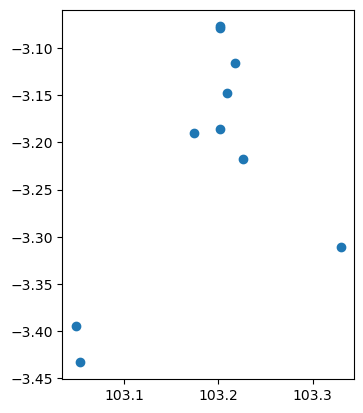

In [12]:
matching_geometries = all_geometries[all_geometries['tile_id'].isin(detections['tile_id'])]
matching_geometries.plot()

In [ ]:

parquet_dir = '/home/christopher.x.ren/embeddings/ra_tea/embeddings'
geometry_dir = '/home/christopher.x.ren/embeddings/ra_tea/tiles'
geometry_files = sorted([os.path.join(geometry_dir, f) for f in os.listdir(geometry_dir)])
geometry_files_list = ",".join([f"'{f}'" for f in geometry_files])

parquet_files = sorted([os.path.join(parquet_dir, f) for f in os.listdir(parquet_dir)])
files_list = ",".join([f"'{f}'" for f in parquet_files])

conn.execute(f"""
    CREATE TABLE embeddings AS 
    SELECT *, ROW_NUMBER() OVER () - 1 as row_number 
    FROM read_parquet([{files_list}])
""")

conn.execute(f"""
    CREATE TABLE geometries AS 
    SELECT * FROM read_parquet([{geometry_files_list}])
""")

# Check if index exists and create if it doesn't
conn.execute("""
    SELECT * FROM duckdb_indexes() WHERE index_name = 'row_number_idx';
""")

conn.execute("""
    SELECT e.*, g.geometry
    FROM embeddings e
    JOIN geometries g ON e.tile_id = g.tile_id
    WHERE e.row_number IN (999, 10, 1999999)
    ORDER BY e.row_number
""").df()




In [4]:
from joblib import Parallel, delayed
import geopandas as gpd
gpd.__version__

'0.14.1'

In [21]:
from joblib import Parallel, delayed
import geopandas as gpd

geometry_files = sorted([os.path.join(geometry_dir, f) for f in os.listdir(geometry_dir)])
gdf = pd.concat(
    Parallel(n_jobs=-1)(
        delayed(gpd.read_parquet)(f) for f in geometry_files
    )
)

ValueError: Cannot determine common CRS for concatenation inputs, got ['WGS 84 / UTM zone 48S', 'WGS 84 / UTM zone 47N', 'WGS 84 / UTM zone 49S', 'WGS 84 / UTM zone 47S']. Use `to_crs()` to transform geometries to the same CRS before merging.

In [5]:
import pandas as pd
import geopandas as gpd
import pyarrow.parquet as pq
import json
parquet_file = pq.ParquetFile(geometry_files[0])
metadata = parquet_file.metadata
print("Parquet metadata:")
print(metadata)
print("\nGeoparquet metadata:")
geo_metadata = metadata.metadata.get(b'geo')
if geo_metadata:
    print("\nGeoparquet metadata (formatted):")
    print(json.dumps(json.loads(geo_metadata), indent=2))
else:
    print("\nNo geoparquet metadata found")

Parquet metadata:
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 2
  num_rows: 196501
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 6308

Geoparquet metadata:

Geoparquet metadata (formatted):
{
  "primary_column": "geometry",
  "columns": {
    "geometry": {
      "crs": "PROJCRS[\"WGS 84 / UTM zone 47S\",BASEGEOGCRS[\"WGS 84\",ENSEMBLE[\"World Geodetic System 1984 ensemble\",MEMBER[\"World Geodetic System 1984 (Transit)\"],MEMBER[\"World Geodetic System 1984 (G730)\"],MEMBER[\"World Geodetic System 1984 (G873)\"],MEMBER[\"World Geodetic System 1984 (G1150)\"],MEMBER[\"World Geodetic System 1984 (G1674)\"],MEMBER[\"World Geodetic System 1984 (G1762)\"],MEMBER[\"World Geodetic System 1984 (G2139)\"],ELLIPSOID[\"WGS 84\",6378137,298.257223563,LENGTHUNIT[\"metre\",1]],ENSEMBLEACCURACY[2.0]],PRIMEM[\"Greenwich\",0,ANGLEUNIT[\"degree\",0.0174532925199433]],ID[\"EPSG\",4326]],CONVERSION[\"UTM zone 47S\",METHOD[\"Transverse Mercator\",ID[\"EPSG\",9807]],PARAMETE

In [2]:
conn.execute("""
    SELECT *
    FROM embeddings
    WHERE row_number IN (9, 99, 999999)
    ORDER BY row_number
""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,vit-dino-patch16_0,vit-dino-patch16_1,vit-dino-patch16_2,vit-dino-patch16_3,vit-dino-patch16_4,vit-dino-patch16_5,vit-dino-patch16_6,vit-dino-patch16_7,vit-dino-patch16_8,vit-dino-patch16_9,...,vit-dino-patch16_376,vit-dino-patch16_377,vit-dino-patch16_378,vit-dino-patch16_379,vit-dino-patch16_380,vit-dino-patch16_381,vit-dino-patch16_382,vit-dino-patch16_383,tile_id,row_number
0,-0.762768,-0.446355,2.111305,2.650689,0.704915,0.319491,-0.449157,-0.438827,-1.038205,-1.627192,...,1.382686,-1.423743,0.159658,-1.133781,0.453387,-0.877539,1.040019,-1.808954,48MUB_32_16_10_9_0,9
1,-0.519229,0.674007,0.579186,-1.079336,0.277206,-1.649148,0.143644,0.411531,-1.050319,1.350603,...,-0.529878,-0.553762,1.560278,0.670864,-1.336419,-1.946143,3.538289,-1.371955,48MUB_32_16_10_99_0,99
2,-0.162588,1.069893,0.777909,1.209502,-0.500419,-1.144658,2.479843,0.794431,-0.487716,3.133220,...,1.324058,-1.510641,0.656487,-0.782555,-0.013039,-2.023698,-0.458342,2.412070,48MUV_32_16_10_421_547,999999


In [5]:
conn.execute("""
    SELECT *
    FROM embeddings
    WHERE row_number IN (999, 10, 1999999, 50, 60, 70, 80, 90, 100)
    ORDER BY row_number
""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,vit-dino-patch16_0,vit-dino-patch16_1,vit-dino-patch16_2,vit-dino-patch16_3,vit-dino-patch16_4,vit-dino-patch16_5,vit-dino-patch16_6,vit-dino-patch16_7,vit-dino-patch16_8,vit-dino-patch16_9,...,vit-dino-patch16_376,vit-dino-patch16_377,vit-dino-patch16_378,vit-dino-patch16_379,vit-dino-patch16_380,vit-dino-patch16_381,vit-dino-patch16_382,vit-dino-patch16_383,tile_id,row_number
0,-0.021837,-1.375536,1.957435,2.160575,-1.578389,-1.495068,1.031892,-0.107813,0.312211,-0.272072,...,1.290998,-0.654316,0.697479,-1.068298,-1.073249,-1.682975,0.287408,0.349375,48MUB_32_16_10_10_0,10
1,1.111559,0.958469,1.087000,1.812684,-1.660230,-2.472209,0.415526,0.036697,-0.463320,-0.768444,...,0.232570,0.154154,-0.029083,-0.526178,0.831943,0.805945,1.048263,-0.698776,48MUB_32_16_10_50_0,50
2,-1.828644,-1.704038,0.757719,1.073178,-0.151040,0.951163,0.022840,-0.463988,0.418131,2.126379,...,1.353361,-1.045434,1.573946,-0.659351,-0.922178,-3.011941,0.260131,-0.994514,48MUB_32_16_10_60_0,60
3,-0.509885,-0.169129,-1.374645,0.180868,1.042674,-0.121532,0.816502,0.762715,0.371493,0.436165,...,-0.554059,-2.485002,1.482929,-0.370081,-0.786514,-2.886187,1.057511,0.237708,48MUB_32_16_10_70_0,70
4,0.048849,-1.491319,-0.115386,1.606723,-0.403242,0.514432,-0.002419,-0.383756,0.704541,0.889178,...,-0.250322,-0.872689,-1.949334,-1.795954,-1.510988,-1.312699,-1.058659,-0.046414,48MUB_32_16_10_80_0,80
5,-0.984505,0.007620,0.269664,-0.662613,0.258260,-0.276150,-0.050723,0.481777,-0.787863,0.056623,...,-0.747460,-1.697166,1.280861,0.714860,-1.486579,-3.548753,1.557490,-1.770024,48MUB_32_16_10_90_0,90
6,-0.916821,-0.251699,-0.168615,-1.794891,0.613040,-1.229416,0.093878,0.813464,-0.383903,0.268137,...,-0.740122,-0.699329,1.375076,1.056216,-1.125321,-1.924947,3.299605,-2.499804,48MUB_32_16_10_100_0,100
7,-0.414238,-2.296230,-0.409299,0.913885,0.023439,-0.912939,0.821193,-0.261721,-0.249429,1.857279,...,0.049539,0.419227,1.045853,-0.257509,-0.664350,-1.927596,-0.851956,1.169754,48MUB_32_16_10_373_1,999
8,-0.188675,-0.825760,-0.333915,-1.111873,1.005943,-0.331334,-0.102389,-0.051344,2.560829,0.669619,...,1.728860,-0.727714,0.981578,0.092464,0.407340,1.200148,1.312519,-2.005857,49MBN_32_16_10_227_531,1999999


In [6]:
files_list

"'/home/christopher.x.ren/embeddings/ra_tea/embeddings/48MUB_2023-01-01_2024-01-01.parquet','/home/christopher.x.ren/embeddings/ra_tea/embeddings/48MTE_2023-01-01_2024-01-01.parquet','/home/christopher.x.ren/embeddings/ra_tea/embeddings/48MUV_2023-01-01_2024-01-01.parquet','/home/christopher.x.ren/embeddings/ra_tea/embeddings/48MTD_2023-01-01_2024-01-01.parquet','/home/christopher.x.ren/embeddings/ra_tea/embeddings/49MDN_2023-01-01_2024-01-01.parquet','/home/christopher.x.ren/embeddings/ra_tea/embeddings/49MBN_2023-01-01_2024-01-01.parquet','/home/christopher.x.ren/embeddings/ra_tea/embeddings/48MUA_2023-01-01_2024-01-01.parquet','/home/christopher.x.ren/embeddings/ra_tea/embeddings/47MQU_2023-01-01_2024-01-01.parquet','/home/christopher.x.ren/embeddings/ra_tea/embeddings/47NLF_2023-01-01_2024-01-01.parquet','/home/christopher.x.ren/embeddings/ra_tea/embeddings/47MPU_2023-01-01_2024-01-01.parquet','/home/christopher.x.ren/embeddings/ra_tea/embeddings/48MZT_2023-01-01_2024-01-01.parquet

In [7]:
os.listdir(parquet_dir)

['48MUB_2023-01-01_2024-01-01.parquet',
 '48MTE_2023-01-01_2024-01-01.parquet',
 '48MUV_2023-01-01_2024-01-01.parquet',
 '48MTD_2023-01-01_2024-01-01.parquet',
 '49MDN_2023-01-01_2024-01-01.parquet',
 '49MBN_2023-01-01_2024-01-01.parquet',
 '48MUA_2023-01-01_2024-01-01.parquet',
 '47MQU_2023-01-01_2024-01-01.parquet',
 '47NLF_2023-01-01_2024-01-01.parquet',
 '47MPU_2023-01-01_2024-01-01.parquet',
 '48MZT_2023-01-01_2024-01-01.parquet',
 '48MYT_2023-01-01_2024-01-01.parquet',
 '48MXT_2023-01-01_2024-01-01.parquet',
 '47NKE_2023-01-01_2024-01-01.parquet',
 '47MQV_2023-01-01_2024-01-01.parquet',
 '47NLC_2023-01-01_2024-01-01.parquet',
 '48MVV_2023-01-01_2024-01-01.parquet',
 '48MVA_2023-01-01_2024-01-01.parquet',
 '47NNA_2023-01-01_2024-01-01.parquet',
 '47NLE_2023-01-01_2024-01-01.parquet',
 '47NND_2023-01-01_2024-01-01.parquet',
 '48MWU_2023-01-01_2024-01-01.parquet',
 '48MVB_2023-01-01_2024-01-01.parquet',
 '48MTB_2023-01-01_2024-01-01.parquet',
 '48MTC_2023-01-01_2024-01-01.parquet',
